# Bithday Problem simulator

First import modules we are going to use

In [1]:
import numpy as np # numpy for vectors and math
import matplotlib.pyplot as plt # matplotlib for plotting
# import seaborn as sn # seaborn for beutiful plots
from numba import jit, njit, prange # numba for speed

# Spacial functions
from math import factorial
from scipy.special import binom
# sn.set_style('whitegrid')

# Bithrday problem, two ways

## 1. Classic way

Count the number of possible cases where everyone ahs a different brith date ($365 \cdot 364 \cdot ... \cdot 365-k+1$) and divide all of the possible birth dates in a room of $k$ people ($365^k$). The probability of at least one match is the complement of that one.

Define the function

In [2]:
def birthday_prob(k):
    num =  factorial(365)
    den = factorial(365-k)*365**k
    return 1-(num/den)

Check it works

In [9]:
birthday_prob(23)

0.5072972343239854

Solve for a range $[2,K]$ of people

In [4]:
K = 40
p_birthdays = np.zeros(K-2)
for i in range(2,K):
    p_birthdays[i-2] = birthday_prob(i)

Plot the result

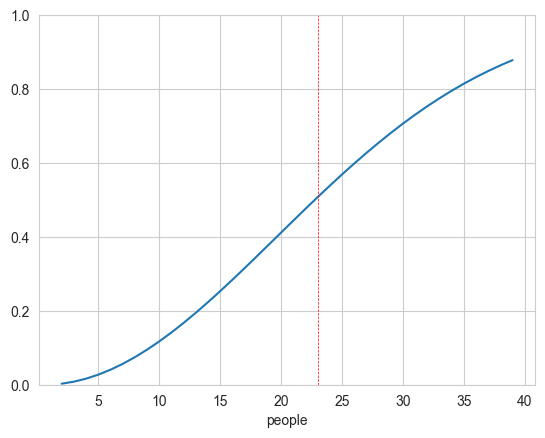

In [5]:
k_range = np.arange(2,K)
plt.plot(k_range, p_birthdays)
plt.axvline(k_range[np.sum(p_birthdays<=0.50)],c='r',ls='--',lw=0.5) # This code finds the index in the p_birthdays vector such that P(k)>50 and plots it
plt.ylim(0,1)
plt.xlabel('people')
plt.show()

## Method 2: Using a Poisson approximation

The probability of one bithday math amount two people is $1/365$. Call that $\lambda$. The number of matches $X\sim Pois((m,2)\lambda)$, where $m$ is the number of people and $(m,2)$ is the number of pairs in the room. 

Since the event "at least one match" is the complement of "no matches watsoever", we are looking for $P(X=0)$. Subbing in:

In [7]:
def p_at_least_one_bday_match(m):
    return 1 -np.exp(-(binom(m,2)*(1/365)))

Check it matches our numbers before

In [8]:
p_at_least_one_bday_match(23)

0.5000017521827107

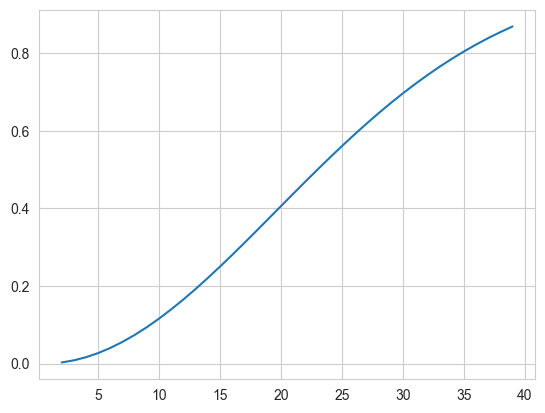

In [10]:
m_range = np.arange(2,200,dtype=int)
plt.plot(k_range,p_at_least_one_bday_match(k_range))
plt.show()